In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from random import *
%matplotlib inline

In [19]:
n_points =  3500
data = np.zeros(shape=(n_points, 2))

for i in range(n_points):
    x = np.random.uniform(0, 4)
    data[i][0] = x
    data[i][1] = (np.sin(np.pi*x)) / (np.pi * x)
    


In [20]:
X = data[:, 0]
X = X.reshape(-1, 1)
y = data[:, 1]
y = y.reshape(-1,1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)


from keras.metrics import MeanSquaredError

In [25]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 32, activation = 'tanh'))
model.add(Dense(units = 16, activation = 'tanh'))
model.add(Dense(units = 8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = [MeanSquaredError()])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150,validation_data=(X_val, y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,min_delta=0.1, verbose=10)])

Epoch 1/150
70/70 [==============================] - 0s 5ms/step - loss: 0.1258 - mean_squared_error: 0.1258 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 2/150
70/70 [==============================] - 0s 2ms/step - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 3/150
70/70 [==============================] - 0s 2ms/step - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 4/150
70/70 [==============================] - 0s 2ms/step - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 5/150
70/70 [==============================] - 0s 2ms/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 6/150
70/70 [==============================] - 0s 2ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 7/150
70/70 [===============

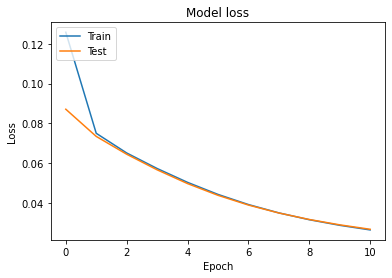

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')